<a href="https://colab.research.google.com/github/1Anass/ML-for-sustainability/blob/main/KNN_BuildingEnergyProfileClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Specify the path to your dataset in Google Drive
file_path = '/content/drive/My Drive/ListingofBuildingEnergyPerformanceData2020.csv'  # Update with your actual path

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)
print(df.columns)
print(df.shape[0]);




Mounted at /content/drive
Index(['buildingname', 'buildingaddress', 'buildingtype',
       'mainbuildingfunction', 'buildingsize', 'yearobtainedtopcsc',
       'greenmarkrating', 'greenmarkyearofaward', 'greenmarkversion',
       'grossfloorarea', 'percentageofairconditionedfloorarea',
       'averagemonthlybuildingoccupancyrate', 'numberofhotelrooms',
       'typeofairconditioningsystem', 'ageofchiller',
       'centralisedairconditioningplantefficiency',
       'yearoflastchillerplantaudithealthcheck', 'percentageusageofled',
       'installationofsolarpv', '2017', '2018', '2019', '2020'],
      dtype='object')
564


The input features are:

- Building name.

- Building address.

- Main Building Function: office, hotel,

retail...etc.

- Building Size: small, large.

- Gross Floor Area: in m^2.

- Percentage of Air Conditioned Floor Area: in m^2.

- Average Monthly Building Occupancy Rate: percentage.

- Type of Air Conditioning System.

- Age of Chiller: in years.

- Centralized Air Conditioning Plant

- Efficiency: between 0 and 1.

- Year of Last Chiller Plant Audit/Health Check.

- Percentage Usage of LED.

- Installation of Solar PV: Y/N.

The output classes are:

- Highly Sustainable
- Moderately Sustainable.
- Not Sustainable.
These classes will be generated based on  Green Mark Rating and (Current year - Green Mark Year of Award).


# Data Exploration




Summary statistics:

- number of samples per class.
- visualize average consumption per year.
- visualize distribution of buildings per building main function, building size, gross floor area, percentage of air conditioned floor area, average monthly building occupancy rate, type of air conditiong plant efficiency, year of last chiller plant audit health check, percentage of usage of led, and installation of solar pv.
- visualize number of missing values per variable.




Number of samples in dataset:  564


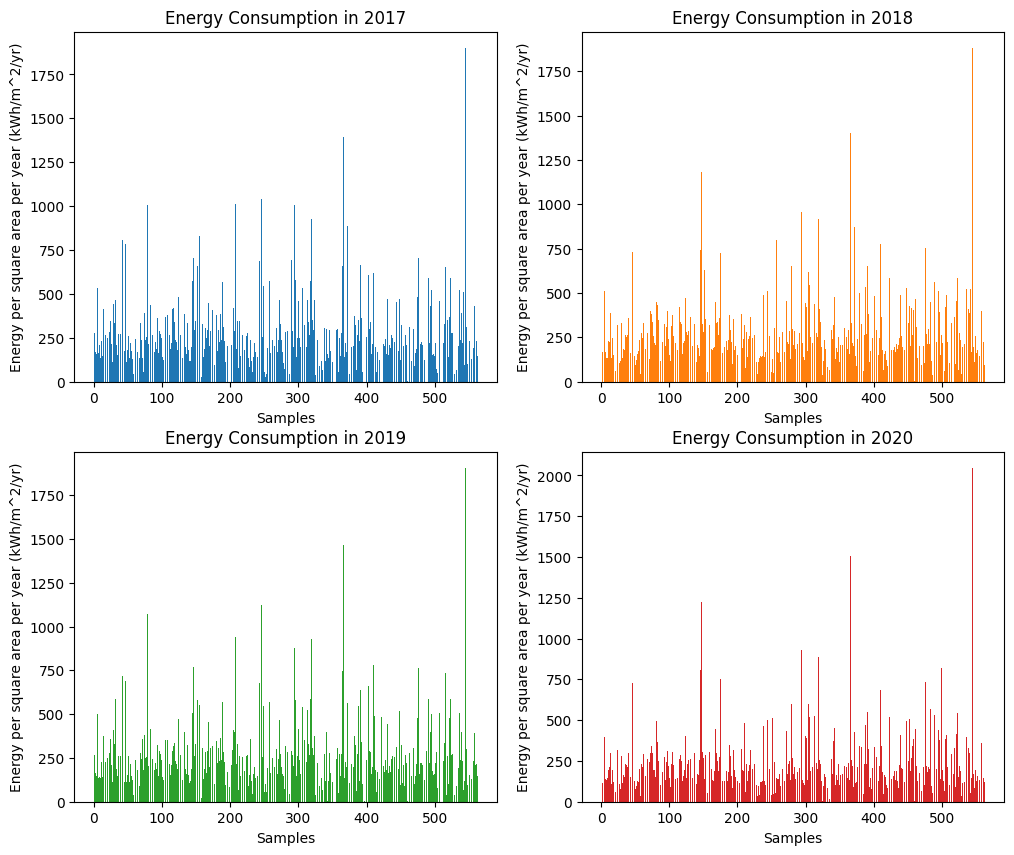

<Figure size 3200x4800 with 0 Axes>

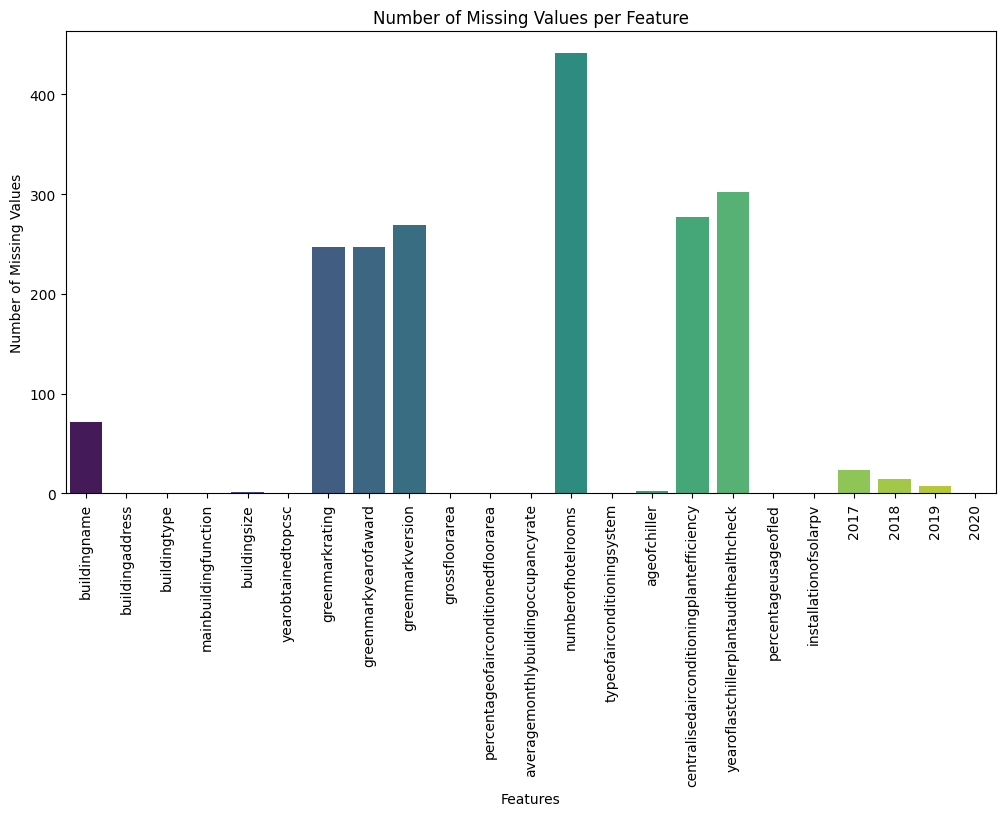

In [ ]:
print("Number of samples in dataset: " , df.shape[0])

import matplotlib.pyplot as plt
features = ['buildingname', 'buildingaddress', 'buildingtype',
       'mainbuildingfunction', 'buildingsize', 'yearobtainedtopcsc',
       'greenmarkrating', 'greenmarkyearofaward', 'greenmarkversion',
       'grossfloorarea', 'percentageofairconditionedfloorarea',
       'averagemonthlybuildingoccupancyrate', 'numberofhotelrooms',
       'typeofairconditioningsystem', 'ageofchiller',
       'centralisedairconditioningplantefficiency',
       'yearoflastchillerplantaudithealthcheck', 'percentageusageofled',
       'installationofsolarpv', '2017', '2018', '2019', '2020']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Iterate through each year and create a bar plot in the corresponding subplot
years = ["2017", "2018", "2019", "2020"]
for i, year in enumerate(years):
    values = df[year]
    row = i // 2  # Determine the row for the subplot
    col = i % 2   # Determine the column for the subplot
    ax = axes[row, col]

    ax.bar(range(len(values)), values, color=f'C{i}')  # Use a different color for each subplot
    ax.set_xlabel("Samples")
    ax.set_ylabel("Energy per square area per year (kWh/m^2/yr)")
    ax.set_title(f"Energy Consumption in {year}")


import seaborn as sns
# Set the figure size for better visualization
plt.figure(figsize=(32, 48))

missing_counts = df[features].isnull().sum()

# Create a bar plot to visualize the number of missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values per Feature")
plt.show()

## Data Preprocessing

The features with high number of missing values and that are important for our case are: [ 'greenmarkrating', 'greenmarkyearofaward', 'greenmarkversion',  'centralisedairconditioningplantefficiency',
            'yearoflastchillerplantaudithealthcheck',
            '2017', '2018', '2019', '2020'].

Let's explore their distribution to see how we can deal with their missing values.


<Figure size 3200x4800 with 0 Axes>

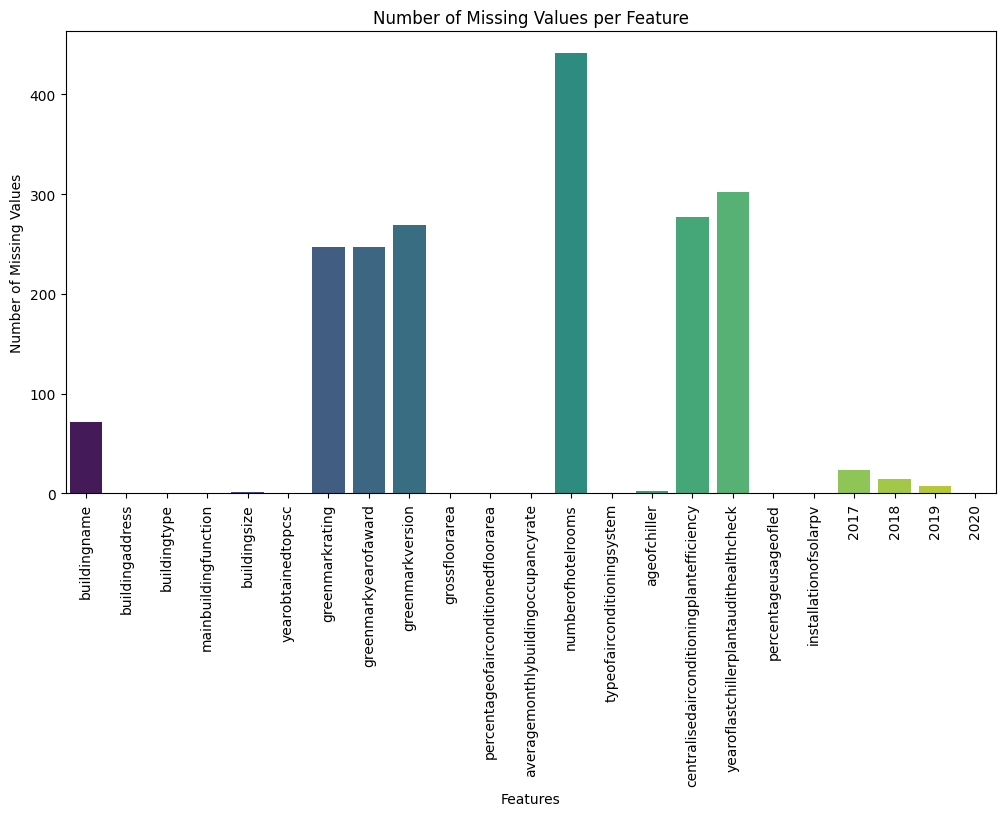

<Figure size 1000x600 with 0 Axes>

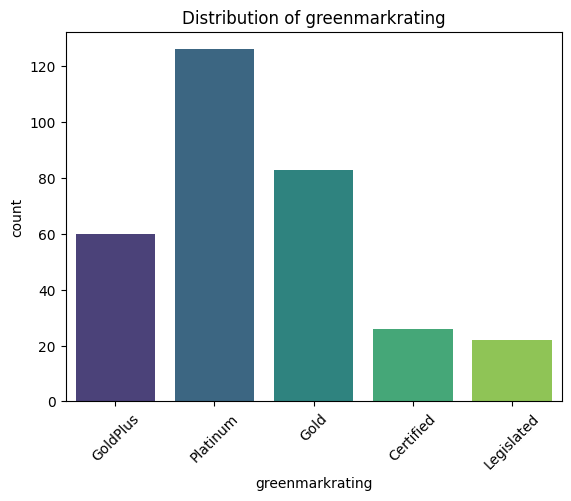

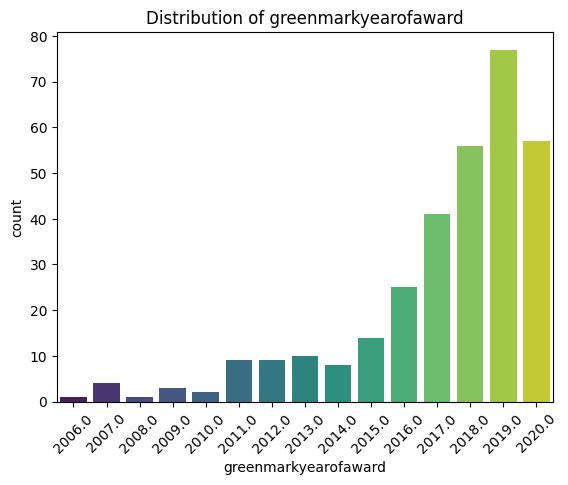

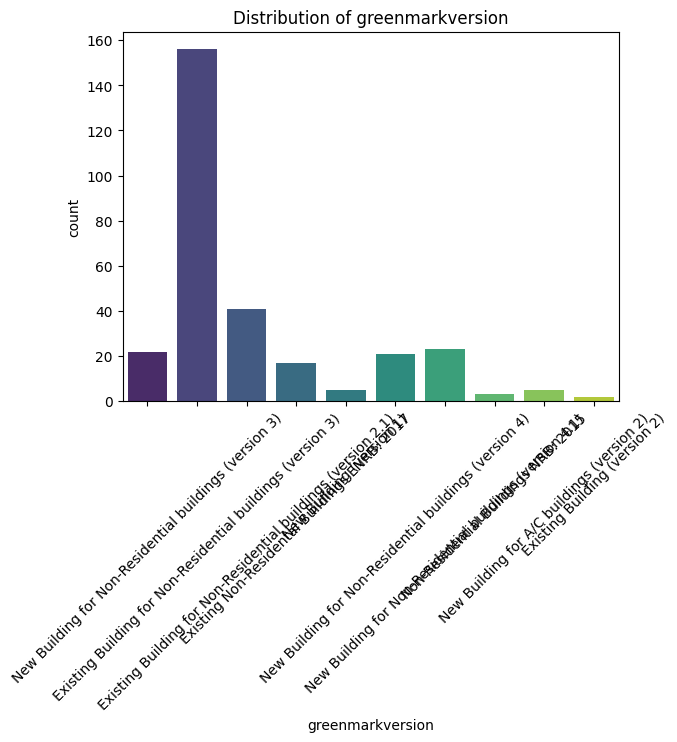

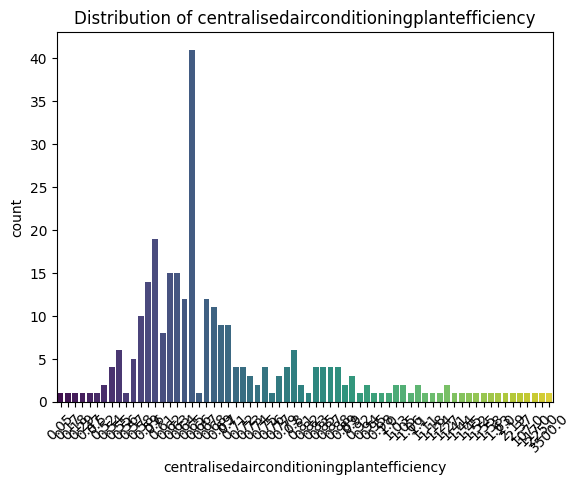

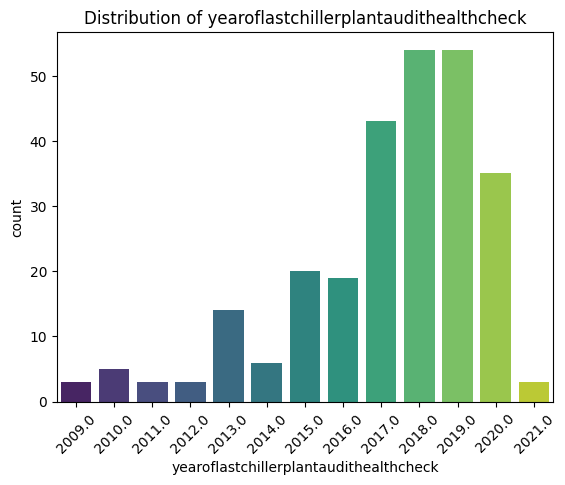

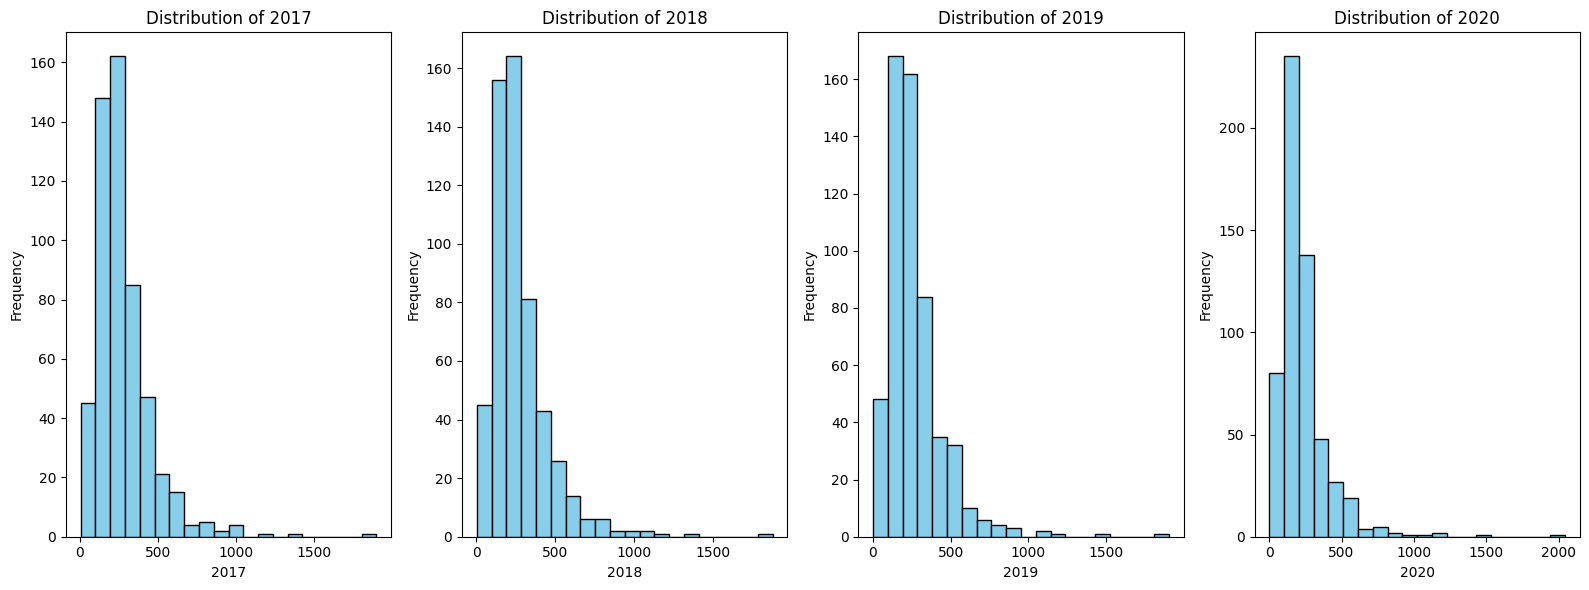

In [ ]:
import seaborn as sns
# Set the figure size for better visualization
plt.figure(figsize=(32, 48))

features =  [ 'greenmarkrating', 'greenmarkyearofaward', 'greenmarkversion', 'centralisedairconditioningplantefficiency', 'yearoflastchillerplantaudithealthcheck', '2017', '2018', '2019', '2020']


# Create a bar plot to visualize the number of missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values per Feature")
plt.show()

# Features to visualize
features = [ 'greenmarkrating', 'greenmarkyearofaward', 'greenmarkversion',  'centralisedairconditioningplantefficiency',
            'yearoflastchillerplantaudithealthcheck']


plt.figure(figsize=(10, 6))

# Create a separate graph for each feature
for feature in features:
    plt.figure()
    sns.countplot(data=df, x=feature, palette="viridis")  # Use a different palette for each feature
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.title(f"Distribution of {feature}")

# Show each individual plot
plt.show()


features = ['2017', '2018', '2019', '2020']

# Set the figure size for better visualization
plt.figure(figsize=(16, 6))

# Create subplots for each feature
for i, feature in enumerate(features, start=1):
    plt.subplot(1, 4, i)  # Create a 1x4 grid of subplots
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')  # Create a histogram
    plt.xlabel(f"{feature}")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature}")

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()


we notice that all features have skewed data with some ones having outliers. Therefore, we opt for choosing the median to replace the missing values.


- Missing values:


For the features greenmarkrating, greenmarkyearofaward, centralisedairconditioningplantefficiency, yearoflastchillerplantaudithealthcheck, 2017, 2018, 2019, 2020, we will replace the missing values with the median.

In [ ]:
features = ['2017', '2018', '2019', '2020']

# Calculate the median for each feature
medians = df[features].median()

# Replace missing values with the median for each feature
df[features] = df[features].fillna(medians)


We notice that green mark rating has ordinal data, we will replace it with numerical data since it s going to be used to compute the output class.


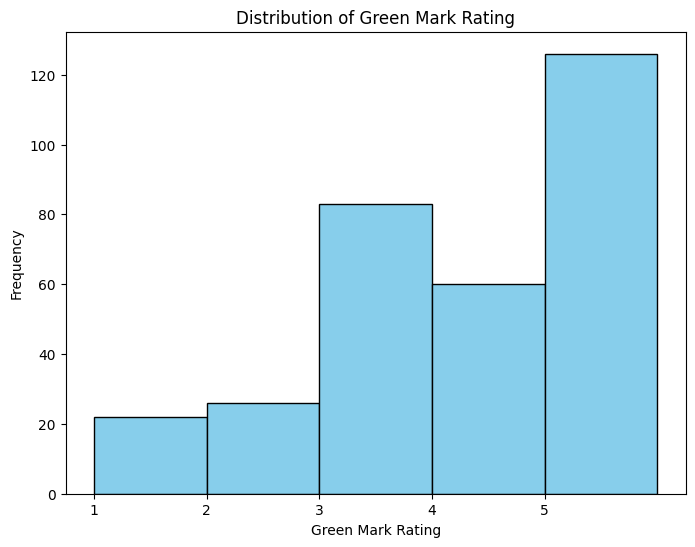

In [ ]:
# Define the mapping of values to rankings
rankings = {
    'Platinum': 5,
    'GoldPlus': 4,
    'Gold': 3,
    'Certified': 2,
    'Legislated': 1
}

# Replace the values in the 'greenmarkrating' column with the rankings
df['greenmarkrating'] = df['greenmarkrating'].map(rankings)

plt.figure(figsize=(8, 6))
plt.hist(df['greenmarkrating'], bins=5, range=(1, 6), color='skyblue', edgecolor='black')
plt.xlabel('Green Mark Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Green Mark Rating')
plt.xticks(range(1, 6))  # Set x-axis ticks to the numerical rankings
plt.show()



Similarly, we replace building size with numerical values.


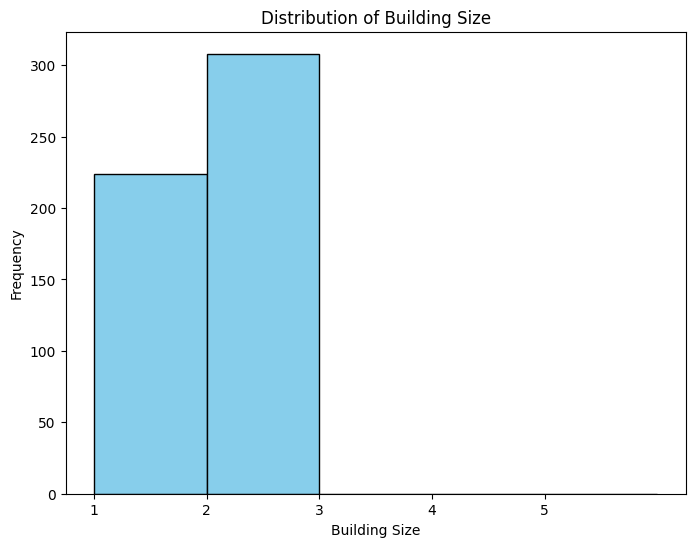

In [ ]:

# Define the mapping of values to rankings
buildingsize = {
    'Large': 2,
    'Small': 1,
    'Omit': None
}

# Replace the values in the 'greenmarkrating' column with the rankings
df['buildingsize'] = df['buildingsize'].map(buildingsize)

plt.figure(figsize=(8, 6))
plt.hist(df['buildingsize'], bins=5, range=(1, 6), color='skyblue', edgecolor='black')
plt.xlabel('Building Size')
plt.ylabel('Frequency')
plt.title('Distribution of Building Size')
plt.xticks(range(1, 6))  # Set x-axis ticks to the numerical rankings
plt.show()

In [ ]:
features = ['buildingsize', 'greenmarkrating', 'greenmarkyearofaward', 'centralisedairconditioningplantefficiency',
            'yearoflastchillerplantaudithealthcheck', 'ageofchiller']

# Calculate the median for each feature
medians = df[features].median()

# Replace missing values with the median for each feature
df[features] = df[features].fillna(medians)


Number of hotel rooms feature is not relevant to us so we drop it.

In [ ]:
# we drop the column number of hotel rooms because it s not relevant since not all buildings in the dataset are hotels.
df.drop(columns=['numberofhotelrooms'], inplace=True)
df.drop(columns=['greenmarkversion'], inplace=True)
df.drop(columns=['buildingname'], inplace=True)
print(df.shape[0])

564


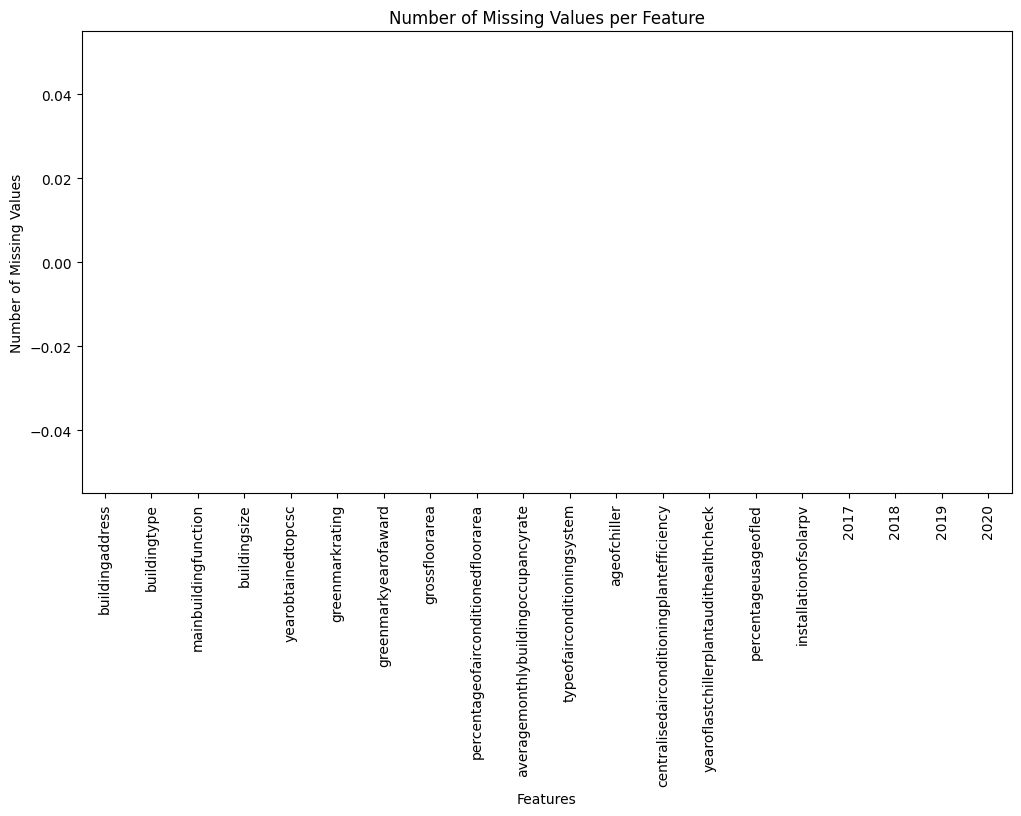

564


In [ ]:


# Features for which you want to plot missing values
features = [ 'buildingaddress', 'buildingtype',
            'mainbuildingfunction', 'buildingsize', 'yearobtainedtopcsc',
            'greenmarkrating', 'greenmarkyearofaward',
            'grossfloorarea', 'percentageofairconditionedfloorarea',
            'averagemonthlybuildingoccupancyrate',
            'typeofairconditioningsystem', 'ageofchiller',
            'centralisedairconditioningplantefficiency',
            'yearoflastchillerplantaudithealthcheck', 'percentageusageofled',
            'installationofsolarpv', '2017', '2018', '2019', '2020']

# Count the number of missing values for each feature
missing_counts = df[features].isnull().sum()

# Create a bar plot to visualize the number of missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values per Feature")

# Show the plot
plt.show()
print(df.shape[0])

Let's see how many columns have non-numerical values, and let's see their unique values

In [ ]:
# Add a new column 'greenmark_combined' that concatenates 'greenmarkrating' and 'greenmarkyearofaward'
non_numerical_columns = []

for column in df.columns:
    if not (pd.api.types.is_numeric_dtype(df[column]) or pd.api.types.is_float_dtype(df[column])):
        non_numerical_columns.append(column)

print("Columns with non-numerical values:")
for column in non_numerical_columns:
    print(column)


Columns with non-numerical values:
buildingaddress
buildingtype
mainbuildingfunction
grossfloorarea
percentageofairconditionedfloorarea
averagemonthlybuildingoccupancyrate
typeofairconditioningsystem
percentageusageofled
installationofsolarpv


Columns that have percentages are also considered non-numerical because they contain the symbol %.

Let's adjust these features to be considered as numerical.

In [ ]:

# Remove '%' symbol and convert to float for percentage columns
percentage_columns = ['percentageofairconditionedfloorarea', 'averagemonthlybuildingoccupancyrate', 'percentageusageofled']

for column in percentage_columns:
    df[column] = df[column].str.replace('%', '', regex=False).astype(float)

non_numerical_columns = []

for column in df.columns:
    if not (pd.api.types.is_numeric_dtype(df[column]) or pd.api.types.is_float_dtype(df[column])):
        non_numerical_columns.append(column)

print("Columns with non-numerical values:")
for column in non_numerical_columns:
    print(column)


Columns with non-numerical values:
buildingaddress
buildingtype
mainbuildingfunction
grossfloorarea
typeofairconditioningsystem
installationofsolarpv


Now we the remaining non-numerical features are:

buildingaddress,
buildingtype,
mainbuildingfunction,
typeofairconditioningsystem,
installationofsolarpv.

Regarding building address, we will only keep the postal code which is the last token if the address. All buildings are in USA, so we cannot have duplicates, and hence this can be used as an ID as well.

In [ ]:
df['buildingaddress'] = df['buildingaddress'].str.extract(r'(\d{5})$')

# Convert the 'postal_code' column to numerical
df['buildingaddress'] = pd.to_numeric(df['buildingaddress'], errors='coerce')  # 'coerce' converts non-numeric values to NaN

print(df[['buildingaddress']].head())
print(df.columns)

   buildingaddress
0             7591
1            49724
2            48943
3            69532
4            79433
Index(['buildingaddress', 'buildingtype', 'mainbuildingfunction',
       'buildingsize', 'yearobtainedtopcsc', 'greenmarkrating',
       'greenmarkyearofaward', 'grossfloorarea',
       'percentageofairconditionedfloorarea',
       'averagemonthlybuildingoccupancyrate', 'typeofairconditioningsystem',
       'ageofchiller', 'centralisedairconditioningplantefficiency',
       'yearoflastchillerplantaudithealthcheck', 'percentageusageofled',
       'installationofsolarpv', '2017', '2018', '2019', '2020'],
      dtype='object')


Now we get the unique values of the remaining non-numerical values, and we will convert them to numerical values.

In [ ]:
# Get unique values for specified columns
unique_buildingtype = df['buildingtype'].unique()
unique_mainbuildingfunction = df['mainbuildingfunction'].unique()
unique_typeofairconditioningsystem = df['typeofairconditioningsystem'].unique()
unique_installationofsolarpv = df['installationofsolarpv'].unique()

# Print the unique values
print("Unique values in 'buildingtype':")
print(unique_buildingtype)

print("\nUnique values in 'mainbuildingfunction':")
print(unique_mainbuildingfunction)

print("\nUnique values in 'typeofairconditioningsystem':")
print(unique_typeofairconditioningsystem)

print("\nUnique values in 'installationofsolarpv':")
print(unique_installationofsolarpv)


Unique values in 'buildingtype':
['Commercial Building']

Unique values in 'mainbuildingfunction':
['Mixed Development' 'Office' 'Retail' 'Hotel']

Unique values in 'typeofairconditioningsystem':
['Water Cooled Chilled Water Plant' 'Others'
 'Air Cooled Chilled Water Plant' 'Water Cooled Packaged Unit'
 'District Cooling Plant']

Unique values in 'installationofsolarpv':
['N' 'Y']


We notice that building type in the whole dataset is set to 'Commercial Building'. So we remove this column.

The other columns we replace them with numbers.

In [ ]:
# Drop the 'buildingtype' column
df.drop(columns=['buildingtype'], inplace=True)

# Define mapping dictionaries for other columns
mainbuildingfunction_mapping = {
    'Mixed Development': 1,
    'Office': 2,
    'Retail': 3,
    'Hotel': 4
}

typeofairconditioningsystem_mapping = {
    'Water Cooled Chilled Water Plant': 1,
    'Others': 2,
    'Air Cooled Chilled Water Plant': 3,
    'Water Cooled Packaged Unit': 4,
    'District Cooling Plant': 5
}

installationofsolarpv_mapping = {
    'N': 0,
    'Y': 1
}

# Map the unique values to numeric values in the corresponding columns
df['mainbuildingfunction'] = df['mainbuildingfunction'].map(mainbuildingfunction_mapping)
df['typeofairconditioningsystem'] = df['typeofairconditioningsystem'].map(typeofairconditioningsystem_mapping)
df['installationofsolarpv'] = df['installationofsolarpv'].map(installationofsolarpv_mapping)

# Print the updated DataFrame
print(df.head(5))


   buildingaddress  mainbuildingfunction  buildingsize  yearobtainedtopcsc  \
0             7591                     1           2.0                1984   
1            49724                     2           1.0                1980   
2            48943                     2           1.0                2011   
3            69532                     2           1.0                1993   
4            79433                     2           1.0                1975   

   greenmarkrating  greenmarkyearofaward grossfloorarea  \
0              4.0                2018.0         65,947   
1              4.0                2018.0          7,372   
2              4.0                2010.0          5,030   
3              4.0                2018.0          5,824   
4              4.0                2018.0         10,418   

   percentageofairconditionedfloorarea  averagemonthlybuildingoccupancyrate  \
0                                 93.0                                 90.0   
1                 


The output classes will be determine based on greenmarkrating and greenmarkyearofaward. So we add a column which the sum of the two and let's see its distribution


```
# This is formatted as code
```



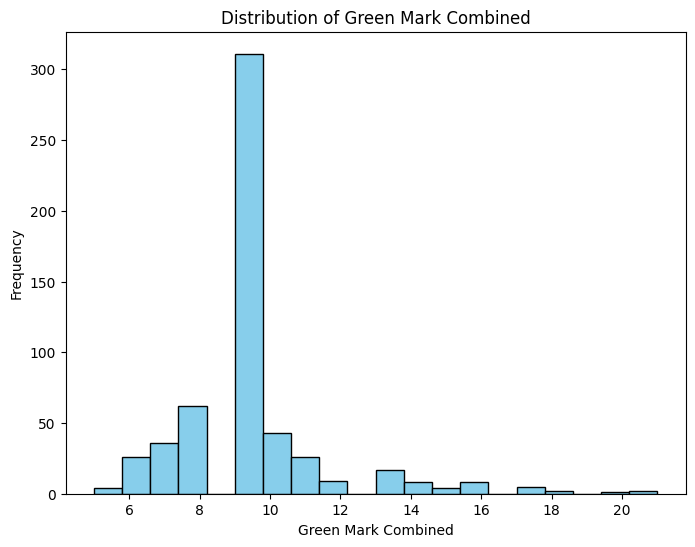

In [ ]:

df['greenmark_combined'] = df['greenmarkrating'] + 2023 - df['greenmarkyearofaward']

import matplotlib.pyplot as plt

# Plot the distribution of 'greenmark_combined'
plt.figure(figsize=(8, 6))
plt.hist(df['greenmark_combined'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Green Mark Combined')
plt.ylabel('Frequency')
plt.title('Distribution of Green Mark Combined')
plt.show()


## Splitting the dataset

We split the dataset in the following proportions:
training dataset: 60%
validation dataset: 20%
test dataset: 20%

We keep the same distribution in all the sets.


Training set shape: (451, 18) (451,)
Validation set shape: (56, 18) (56,)
Test set shape: (57, 18) (57,)


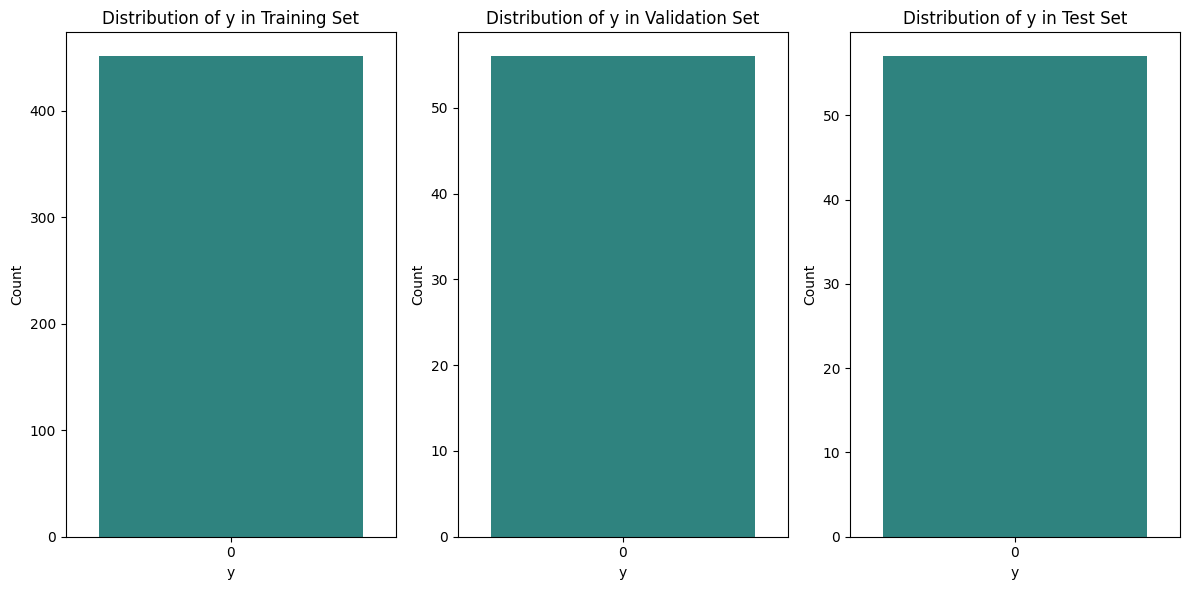

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns

# Convert the column to a string type
df['grossfloorarea'] = df['grossfloorarea'].astype(str)

# Replace commas with periods in the specific column
df['grossfloorarea'] = df['grossfloorarea'].str.replace(',', '.')

# Convert the column to a numeric data type
df['grossfloorarea'] = pd.to_numeric(df['grossfloorarea'], errors='coerce')


# Define the features (X) and the target (y) for your dataset
X = df.drop(columns=['greenmarkrating', 'greenmarkyearofaward'])  # Replace with your features
y = df['greenmark_combined']  # Replace with your target column

# Split the data into training (80%) and the rest (20%)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the rest (20%) into validation (10%) and test (10%)
X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

# Flatten the y sets to make them one-dimensional
y_train = y_train.ravel()
y_valid = y_valid.ravel()
y_test = y_test.ravel()

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Combine the sets and labels for easier plotting
sets = ['Training', 'Validation', 'Test']
y_sets = [y_train, y_valid, y_test]

# Create subplots
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.countplot(y_sets[i], palette="viridis")
    plt.title(f"Distribution of y in {sets[i]} Set")
    plt.xlabel("y")
    plt.ylabel("Count")

# Adjust the layout
plt.tight_layout()
plt.show()


## Cross Validation to find the best K

In [ ]:
from sklearn.model_selection import cross_val_score
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mean_scores = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())
best_k = k_values[mean_scores.index(max(mean_scores))]

print(best_k)
print(mean_scores)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

8
[0.3903052503052503, 0.4390231990231991, 0.43680097680097674, 0.47001221001221005, 0.49006105006105, 0.4856166056166056, 0.5100610500610501, 0.521098901098901, 0.5144322344322344]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define a list of k values to test
k_values = [1, 3, 5, 7, 9]
mean_scores = []

# Find the best k using cross-validation
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

best_k = k_values[mean_scores.index(max(mean_scores))]
print("Best k:", best_k)

# Train the KNN classifier with the best k on the entire training dataset
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)

# Test the classifier on the test dataset
y_pred = best_knn_classifier.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best k: 9
Accuracy on test data: 0.5614035087719298


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Now, we train the knn classifier with k = 9;

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# You can't calculate specificity, false negative rate, and false positive rate directly in multiclass
# classification, as these metrics are typically used in binary classification.

# Print results
print("Micro Precision:", precision)
print("Micro Recall:", recall)
print("Micro F1 Score:", f1)


Accuracy: 0.5614035087719298
Micro Precision: 0.5614035087719298
Micro Recall: 0.5614035087719298
Micro F1 Score: 0.5614035087719298
